Author: Aleksandar Nikolic

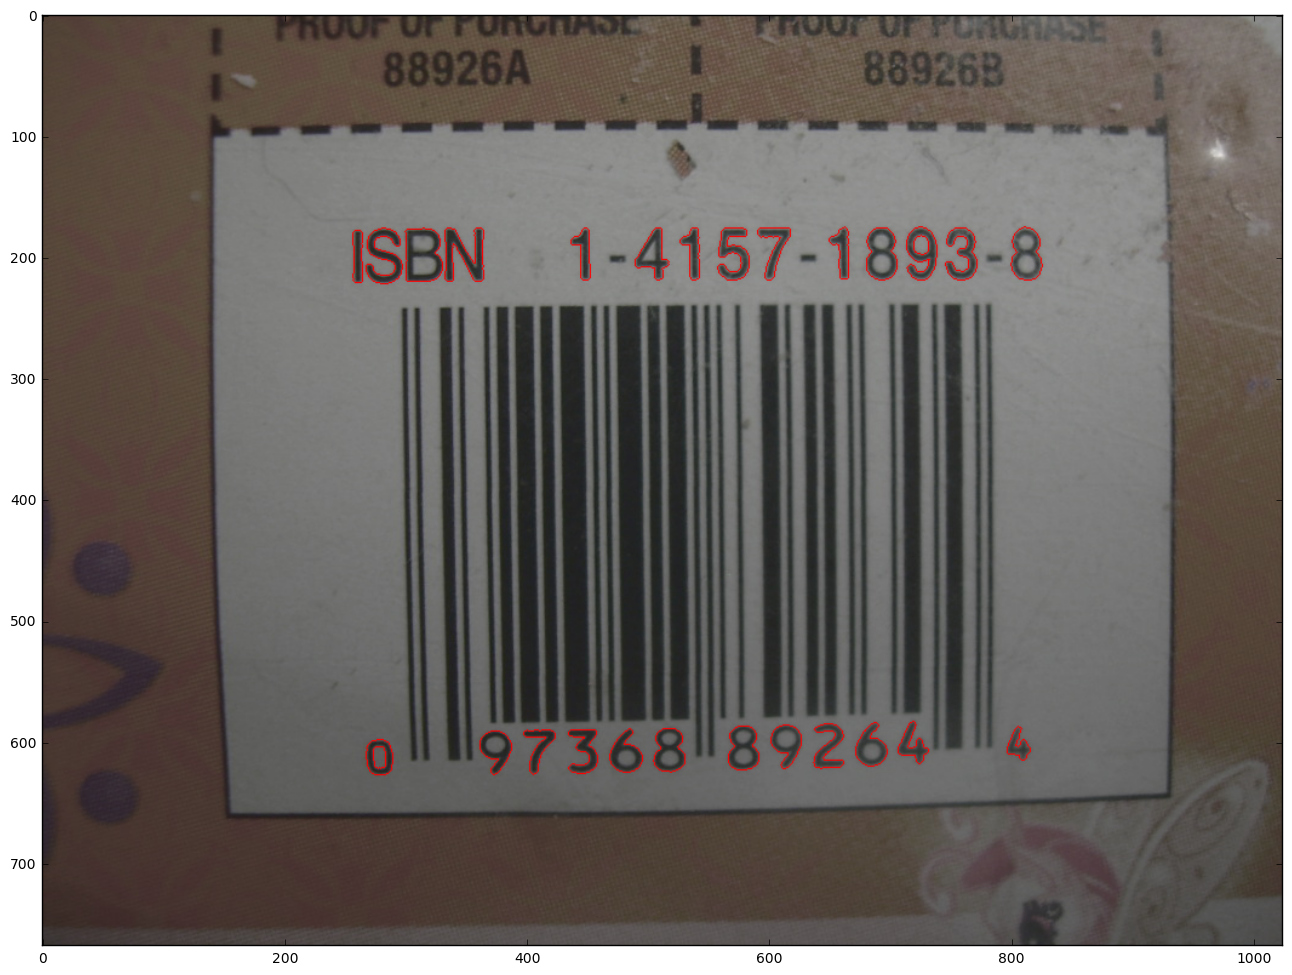

In [4]:
import matplotlib.pyplot as plt  
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 

import matplotlib.pylab as pylab
# prikaz vecih slika 
pylab.rcParams['figure.figsize'] = 16,12

import numpy as np
import cv2 # OpenCV biblioteka

img_barcode = cv2.cvtColor(cv2.imread('../../images/barcode.jpg'), cv2.COLOR_BGR2RGB)
#plt.imshow(img_barcode)
img_barcode_gs = cv2.cvtColor(img_barcode, cv2.COLOR_RGB2GRAY) # konvert u grayscale
#plt.imshow(img_barcode_gs, 'gray')
#ret, image_barcode_bin = cv2.threshold(img_barcode_gs, 80, 255, cv2.THRESH_BINARY)
image_barcode_bin = cv2.adaptiveThreshold(img_barcode_gs, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 10)
#plt.imshow(image_barcode_bin, 'gray')
img, contours, hierarchy = cv2.findContours(image_barcode_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img = img_barcode.copy()
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
#plt.imshow(img)

contours_barcode = [] 
for contour in contours: 
    center, size, angle = cv2.minAreaRect(contour)
    width, height = size
    x, y = center
    if y > 150 and y < 700 and x > 200 and x < 900 and width > 3 and width < 50 and height > 15 and height < 100:
        contours_barcode.append(contour)

img = img_barcode.copy()
cv2.drawContours(img, contours_barcode, -1, (255, 0, 0), 1)
plt.imshow(img)